In [ ]:
import nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#download nltk library Valence Aware Dictionary and sEntiment Reasoner
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#create function for getting sentiment from each tweet
def get_emotion(text):
    sid = SentimentIntensityAnalyzer() #create instance for sentimentintensityanalyzer
    score = sid.polarity_scores(text)  #calculate polarity for each tweet and store these values in compound (pos,neg,neu)
    if score['compound'] >= 0.5:
        return 'joyful'
    elif score['compound'] > 0:
        return 'happy'
    elif score['compound'] == 0:
        return 'neutral'
    elif score['compound'] > -0.5:
        return 'sad'
    else:
        return 'angry'

In [ ]:
from google.colab import files
upload = files.upload()

Saving turkey.csv to turkey.csv


In [ ]:
turkey = pd.read_csv('turkey.csv', encoding = 'ISO-8859-1')

In [ ]:
turkey.isnull().sum()

Unnamed: 0    0
Date          2
Time          2
user          2
Tweet         2
dtype: int64

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 3.5 MB/s eta 0:00:00


In [ ]:
turkey = turkey.dropna()

In [ ]:
import neattext.functions as nfx

In [ ]:
turkey['Tweet']

0        The situation in Kahramanmaras proved civiliza...
1        Please donate, like share RAISE AWARENESS THAT...
2        Alhamdulilllah they are safe and sound â¤ï¸ ...
3        @patagonia @fcdsurfboards Send the best warmes...
4        Alhamdulillah ...A 10 day old baby was rescued...
                               ...                        
48078    Big earthquake felt throughout #Lebanon just a...
48079    A powerful #earthquake just hit Metn area in L...
48080    #Turkish Volunteers Train For The Ukrainian Fr...
48081    ðThe #Turkish authorities have demanded the...
48082    ðThe #Turkish authorities have demanded the...
Name: Tweet, Length: 48081, dtype: object

In [ ]:
turkey['extracted_hashtags']=turkey['Tweet'].apply(nfx.extract_hashtags)

In [ ]:
turkey['clean_tweet']=turkey['Tweet'].apply(nfx.remove_hashtags)

In [ ]:
turkey['clean_tweet']

0        The situation in Kahramanmaras proved civiliza...
1        Please donate, like share RAISE AWARENESS THAT...
2        Alhamdulilllah they are safe and sound â¤ï¸ ...
3        @patagonia @fcdsurfboards Send the best warmes...
4        Alhamdulillah ...A 10 day old baby was rescued...
                               ...                        
48078    Big earthquake felt throughout   just a few mo...
48079    A powerful   just hit Metn area in Lebanon at ...
48080      Volunteers Train For The Ukrainian Frontline...
48081    ðThe   authorities have demanded the former...
48082    ðThe   authorities have demanded the former...
Name: clean_tweet, Length: 48081, dtype: object

In [ ]:
turkey['clean_tweet'] = turkey['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
turkey['clean_tweet'] = turkey['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
turkey['clean_tweet'] = turkey['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
turkey['clean_tweet'] = turkey['clean_tweet'].apply(nfx.remove_stopwords)

In [ ]:
turkey['clean_tweet'] = turkey['clean_tweet'].apply(nfx.remove_special_characters)

In [ ]:
turkey[['Tweet','clean_tweet']]

,Tweet,clean_tweet
0,The situation in Kahramanmaras proved civiliza...,situation Kahramanmaras proved civilization fr...
1,"Please donate, like share RAISE AWARENESS THAT...",donate like share RAISE AWARENESS KEY Literall...
2,Alhamdulilllah they are safe and sound â¤ï¸ ...,Alhamdulilllah safe sound
3,@patagonia @fcdsurfboards Send the best warmes...,patagonia fcdsurfboards Send best warmest coat...
4,Alhamdulillah ...A 10 day old baby was rescued...,Alhamdulillah 10 day old baby rescued alive Tu...
...,...,...
48078,Big earthquake felt throughout #Lebanon just a...,Big earthquake felt moments ago entire buildin...
48079,A powerful #earthquake just hit Metn area in L...,powerful hit Metn area Lebanon 0315 local time...
48080,#Turkish Volunteers Train For The Ukrainian Fr...,Volunteers Train Ukrainian Frontlines group vo...
48081,ðThe #Turkish authorities have demanded the...,The authorities demanded mayor southeastern pr...


In [ ]:
turkey['Score1'] = turkey['clean_tweet'].apply(get_emotion)

In [ ]:
turkey.head(5)

,Unnamed: 0,Date,Time,user,Tweet,extracted_hashtags,clean_tweet,Score1
0,0,2023-02-10 23:59:10+00:00,23:59:10,Jerusalem_Post,The situation in Kahramanmaras proved civiliza...,[#TurkeySyriaEarthquake],situation Kahramanmaras proved civilization fr...,neutral
1,1,2023-02-10 23:58:58+00:00,23:58:58,Punnycatapult,"Please donate, like share RAISE AWARENESS THAT...","[#earthquaketurkey, #TurkeySyriaEarthquake, #T...",donate like share RAISE AWARENESS KEY Literall...,happy
2,2,2023-02-10 23:58:21+00:00,23:58:21,HosenMosharraf1,Alhamdulilllah they are safe and sound â¤ï¸ ...,"[#earthquaketurkey, #TurkeySyriaEarthquake, #H...",Alhamdulilllah safe sound,happy
3,3,2023-02-10 23:58:19+00:00,23:58:19,TodaywithBenja,@patagonia @fcdsurfboards Send the best warmes...,[#TurkeySyriaEarthquake],patagonia fcdsurfboards Send best warmest coat...,joyful
4,4,2023-02-10 23:58:19+00:00,23:58:19,ib_mohh,Alhamdulillah ...A 10 day old baby was rescued...,"[#Florida, #Syria, #Hausa, #Joha, #Erica, #Qud...",Alhamdulillah 10 day old baby rescued alive Tu...,joyful


In [ ]:
#calculating percentage of happy tweets
happy=turkey[turkey['Score1']=="happy"]
print(str(happy.shape[0]/(turkey.shape[0])*100)+" % Happy Tweets")
Happy=happy.shape[0]/turkey.shape[0]*100

24.47328466546037 % Happy Tweets


In [ ]:
#calculating percentage of angry tweets
angry=turkey[turkey['Score1']=="angry"]
print(str(angry.shape[0]/(turkey.shape[0])*100)+" % Angry Tweets")
Angry=angry.shape[0]/turkey.shape[0]*100

18.58738378985462 % Angry Tweets


In [ ]:
#calculating percentage of sad tweets
sad=turkey[turkey['Score1']=="sad"]
print(str(sad.shape[0]/(turkey.shape[0])*100)+" % Sad Tweets")
Sad=sad.shape[0]/turkey.shape[0]*100

15.82329818431397 % Sad Tweets


In [ ]:
#calculating percentage of joyful tweets
joyful=turkey[turkey['Score1']=="joyful"]
print(str(joyful.shape[0]/(turkey.shape[0])*100)+" % Joyful Tweets")
Joyful=joyful.shape[0]/turkey.shape[0]*100

22.823984526112184 % Joyful Tweets


In [ ]:
#calculating percentage of neutral tweets
neutral=turkey[turkey['Score1']=="neutral"]
print(str(neutral.shape[0]/(turkey.shape[0])*100)+" % Neutral Tweets")
Neutral=neutral.shape[0]/turkey.shape[0]*100

18.292048834258857 % Neutral Tweets


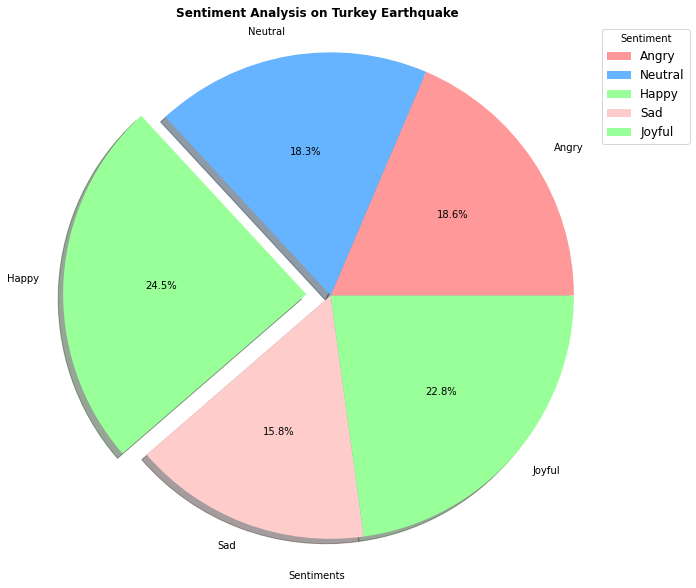

In [ ]:
# Pie chart

labels = ['Angry', 'Neutral', 'Happy', 'Sad', 'Joyful']
sizes = [Angry, Neutral, Happy, Sad, Joyful]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcccc','#99ff99']
explode = (0, 0, 0.1, 0, 0)  # only "explode" the 3rd slice (Happy)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.xlabel("Sentiments")
#plt.ylabel("Percentage")
plt.title("Sentiment Analysis on Turkey Earthquake", fontweight='bold')
plt.legend(title='Sentiment', labels=labels, loc="upper left", bbox_to_anchor=(1,1), fontsize=12)
plt.show()

<BarContainer object of 5 artists>

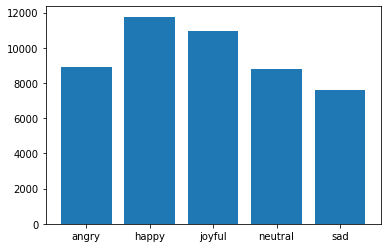

In [ ]:
#bar chart

labels = turkey.groupby('Score1').count().index.values #(how many values fall in happy cateogery)
values = turkey.groupby('Score1').size().values #sizes(happy,depressed,neutral)
plt.bar(labels,values)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(turkey, test_size=0.3, random_state=42)

In [ ]:
test_data['predicted'] = test_data['clean_tweet'].apply(get_emotion)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_data['Score1'], test_data['predicted'])
print("Accuracy: ", score)

Accuracy:  1.0
